In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:

# the relative path of the stroke csv dataset is saved into the variable data for ease of use
data = '../data/stroke.csv'

# The data is read and saved in a variable (stroke)
stroke = pd.read_csv(data)

stroke = pd.DataFrame(stroke)


stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# get and print info on the stroke dataframe
stroke.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# data standardization - chnaging the uppercase 'R' to lowercase 'r' 
stroke = stroke.rename(columns={"Residence_type": "residence_type"})


In [5]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
# Missing values summary:
# Count NaN values per column
nan_counts = stroke.isna().sum()

# Count "Unknown" values per column
unknown_counts = (stroke == "Unknown").sum()

# Combine into one table
summary_table = pd.DataFrame({
    "NaN Count": nan_counts,
    "Unknown Count": unknown_counts,
    "Total Missing": nan_counts + unknown_counts
})

print(summary_table)


                   NaN Count  Unknown Count  Total Missing
id                         0              0              0
gender                     0              0              0
age                        0              0              0
hypertension               0              0              0
heart_disease              0              0              0
ever_married               0              0              0
work_type                  0              0              0
residence_type             0              0              0
avg_glucose_level          0              0              0
bmi                      201              0            201
smoking_status             0           1544           1544
stroke                     0              0              0


## Handle missing values: Imputation
- BMI
- building the KNN model for imputation.

In [7]:
#bmi
#building the KNN model for imputation.
stroke_copy_bmi = stroke.copy() # df to handle bmi

         bmi
0  36.600000
1  34.388889
2  32.500000
3  34.400000
4  24.000000


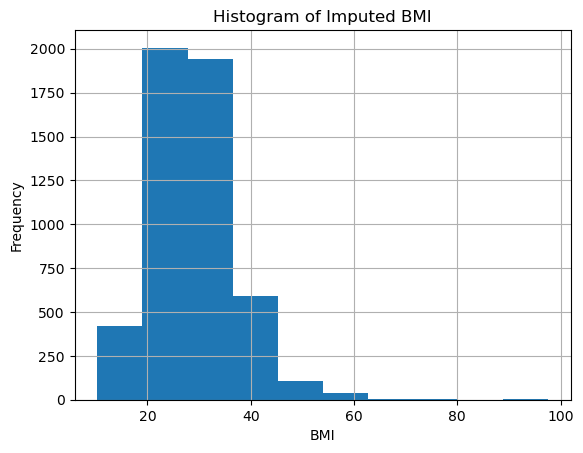

In [8]:
# Imputation Using KNN = 9

# Convert categorical column 'gender' to numeric values (Male=1, Female=0, Other=2)
stroke_copy_bmi['gender'] = stroke_copy_bmi['gender'].map({'Male':1, 'Female':0, 'Other':2})

# Select only numerical columns for KNN imputation
X = stroke_copy_bmi[['gender', 'age', 'hypertension', 'heart_disease', 
                     'avg_glucose_level', 'bmi', 'stroke']]

# Save mask of NaN positions in bmi (optional, useful for checking imputations later)
nan_mask = X['bmi'].isna()

# Apply KNN imputer with n_neighbors=9
imputer = KNNImputer(n_neighbors=9, weights="uniform")
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame with same columns and index
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)

# Replace the original bmi column with the imputed one
stroke_copy_bmi['bmi'] = X_imputed_df['bmi']

# Check result
print(stroke_copy_bmi[['bmi']].head())

# Plot histogram of the imputed bmi column
stroke_copy_bmi['bmi'].hist()
plt.title("Histogram of Imputed BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


### Imputation with KNN
- To Use KNN we select only numerical columns, but gender is a categorical columns that is important and have impact in bmi, therefore we change it in a numerical column where: 'Male':1, 'Female':0, 'Other':2.
- Now our numerical columns to use in KNN imputation are:'gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke'
- The categorical columns that we exclude for our imputation because it have low or non impact in bmi are: 'ever_married', 'work_type', 'residence_type', 'smoking_status'. 
- We select a NN = 9 with weights="uniform". 

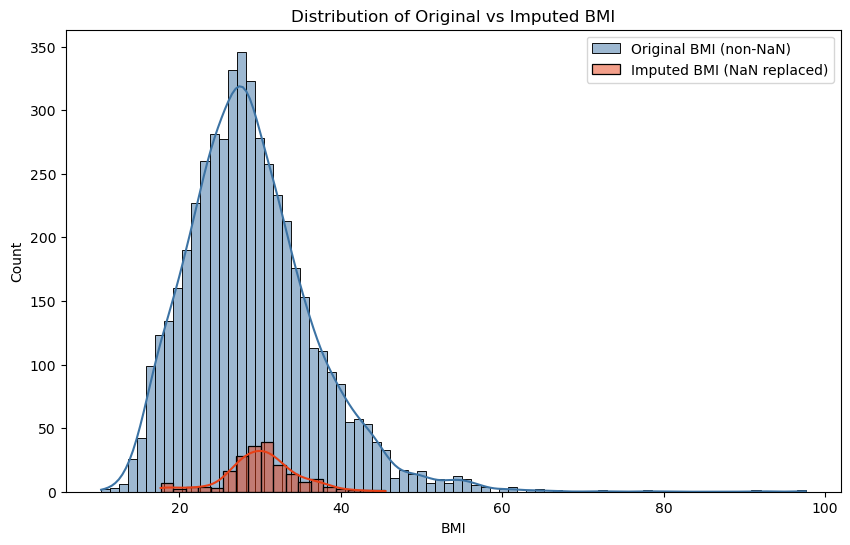

In [9]:
# Plot distributions
plt.figure(figsize=(10,6))

sns.histplot(stroke['bmi'].dropna(), color="#3c73a4", label="Original BMI (non-NaN)", kde=True)
sns.histplot(X_imputed_df.loc[nan_mask, 'bmi'], color="#e84016", label="Imputed BMI (NaN replaced)", kde=True)

plt.title("Distribution of Original vs Imputed BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.legend()
plt.show()


- In this histogram we can see in blue the original BMI values without NaN, and in red the imputed BMI values with NaN replaced by KNN imputation. 
- We see how the imputation was with a uniform distribution following the distribution of Original BMI valuos non-NaN

In [10]:
stroke_copy_bmi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,34.388889,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,Yes,Private,Urban,83.75,27.344444,never smoked,0
5106,44873,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,1,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [11]:
#  we return the column gender from numerical to categorical to stroke_copy_processed. 
# Create a copy of the DataFrame
stroke_copy_processed = stroke_copy_bmi.copy()

# Map numeric values back to categorical labels
stroke_copy_processed['gender'] = stroke_copy_processed['gender'].map({1:'Male', 0:'Female', 2:'Other'})

# Check the first few rows
print(stroke_copy_processed[['gender']].head())


   gender
0    Male
1  Female
2    Male
3  Female
4  Female


In [12]:
stroke_copy_processed

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.388889,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,27.344444,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [13]:
stroke_copy_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:

# Select only numeric columns and calculate min and max
numeric_summary = stroke_copy_processed.select_dtypes(include="number").agg(["min", "max"]).T

# Rename columns for clarity
numeric_summary.columns = ["Min Value", "Max Value"]

print(numeric_summary)


                   Min Value  Max Value
id                     67.00   72940.00
age                     0.08      82.00
hypertension            0.00       1.00
heart_disease           0.00       1.00
avg_glucose_level      55.12     271.74
bmi                    10.30      97.60
stroke                  0.00       1.00


- A deeper analysis of the age variable is necessary to understand values below 1 year.

In [15]:
# Filter observations where age is less than 1 year
under_one_year_table = stroke_copy_processed[stroke_copy_processed["age"] < 1]

# Display the table
from IPython.display import display

display(under_one_year_table)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.900000,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.500000,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.200000,Unknown,0
982,54747,Male,0.88,0,0,No,children,Rural,157.57,19.200000,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.300000,Unknown,0
1093,66772,Female,0.32,0,0,No,children,Rural,55.86,16.000000,Unknown,0
1206,68908,Female,0.72,0,0,No,children,Urban,66.36,23.000000,Unknown,0
1317,30084,Male,0.80,0,0,No,children,Rural,98.67,17.500000,Unknown,0
1600,40544,Male,0.40,0,0,No,children,Urban,109.56,14.300000,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.100000,Unknown,0


## Annotations about Age < 1
When exploring the age variable, we can see that there are some observations with an age of less than one year. After examining other features such as hypertension, heart_disease, ever_married, work_type, and smoking_status, we conclude that these are real observations. For this reason, we decided not to remove the decimal values from this attribute.


In [16]:
#remove decimals from 'avg_glucose_level', 'bmi'
# Remove decimals by converting to integers
cols_to_round = [ "avg_glucose_level", "bmi"]
stroke_copy_processed[cols_to_round] = stroke_copy_processed[cols_to_round].round().astype(int)


- Due to the wide range of values in BMI, age, and average_glucose_level, subcategories were created to facilitate further data analysis.


In [17]:
# Create subcategories for age, bmi and glucose average:

#Age categories: 
# Define the bins (boundaries) of x-axis categories
bins = [0, 14, 25, 65, float('inf')]

# Define the labels for each bin
labels = ['Children', 'Youth', 'Adult', 'Senior']

# Create a new column for age categories
stroke_copy_processed['age_category'] = pd.cut(
    stroke_copy_processed['age'],
    bins=bins,
    labels=labels,
    right=False
)


#BMI categories: 
# Define the bins (boundaries) of x-axis categories
bins = [ 0, 18.5, 25, 30, float('inf')]

# Define the labels for each bin
labels = [ 'Underweight','Healthy Weight', 'Overweight', 'Obesity']

# Create a new column for BMI category type
stroke_copy_processed['bmi_category'] = pd.cut(
    stroke_copy_processed['bmi'],
      bins=bins, 
      labels=labels, 
      right=False)


# Glcuose average categories: 
# Define the bins (boundaries) of x-axis categories
bins = [0, 70, 140, 200, float('inf')]

# Define the labels for each bin
labels = ['Low', 'Healthy', 'Pre-Diabetic', 'Diabetic']

# Create a new column for glucose categories
stroke_copy_processed['glucose_category'] = pd.cut(
    stroke_copy_processed['avg_glucose_level'],
    bins=bins,
    labels=labels,
    right=False
)

In [18]:
stroke_copy_processed.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,229,37,formerly smoked,1,Senior,Obesity,Diabetic
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202,34,never smoked,1,Adult,Obesity,Diabetic
2,31112,Male,80.0,0,1,Yes,Private,Rural,106,32,never smoked,1,Senior,Obesity,Healthy
3,60182,Female,49.0,0,0,Yes,Private,Urban,171,34,smokes,1,Adult,Obesity,Pre-Diabetic
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174,24,never smoked,1,Senior,Healthy Weight,Pre-Diabetic


In [19]:
stroke_copy_processed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   int64   
 9   bmi                5110 non-null   int64   
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  age_category       5110 non-null   category
 13  bmi_category       5110 non-null   category
 14  glucose_category   5110 non-null   category
dtypes: category(3), float64(1), int64(6), object(5)
memory 

- Once the dataset was cleaned and standardized, the analysis was conducted.


relative_path = "./data/stroke_copy_processed.csv" # Define relative path for the CSV file


stroke_copy_processed.to_csv(relative_path, 
index=False, 
encoding="utf-8") # Export DataFrame to CSV using relative path


print(f"File successfully saved at: {relative_path}")